In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# 간단한 NN 구축
class _01(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(_01, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [3]:
# 학습 데이터 랜덤하게 설정
input_size = 784
hidden_size = 100
num_classes = 10
batch_size = 8
num_samples = 100
x = torch.randn(num_samples, input_size)
y = torch.randint(0, num_classes, (num_samples,))

In [5]:
x.shape

torch.Size([100, 784])

In [6]:
y.shape

torch.Size([100])

In [7]:
## 생성 모델 아키텍쳐
model = _01(input_size, hidden_size, num_classes) ## Model Family 정의
criterion = nn.CrossEntropyLoss() ## 학습 목표 설정
optimizer = optim.SGD(model.parameters(), lr=0.01) ## 최적화 방법 정의 (Stochastic Gradient Descent!)

In [11]:
## 학습 단계
num_epochs = 100
losses = []
accuracies = []

for epoch in range(num_epochs):
    optimizer.zero_grad()  ## 기울기 0으로 초기화 \theta^0
    outputs = model(x)  ## 모델의 forward pass
    loss = criterion(outputs, y)  ## 손실 계산
    loss.backward()  ## 역전파를 통해 기울기 계산 (Backpropagation)
    optimizer.step()  ## 최적화 단계: 모델의 파라미터 업데이트
    
    # 손실 기록
    losses.append(loss.item())
    
    # 정확도 기록
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y).sum().item() / num_samples
    accuracies.append(accuracy)

    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}')

Epoch [1/100], Loss: 2.1630, Accuracy: 0.34
Epoch [11/100], Loss: 2.0474, Accuracy: 0.54
Epoch [21/100], Loss: 1.9368, Accuracy: 0.73
Epoch [31/100], Loss: 1.8299, Accuracy: 0.83
Epoch [41/100], Loss: 1.7258, Accuracy: 0.89
Epoch [51/100], Loss: 1.6236, Accuracy: 0.92
Epoch [61/100], Loss: 1.5232, Accuracy: 0.95
Epoch [71/100], Loss: 1.4246, Accuracy: 0.97
Epoch [81/100], Loss: 1.3281, Accuracy: 0.98
Epoch [91/100], Loss: 1.2342, Accuracy: 0.98


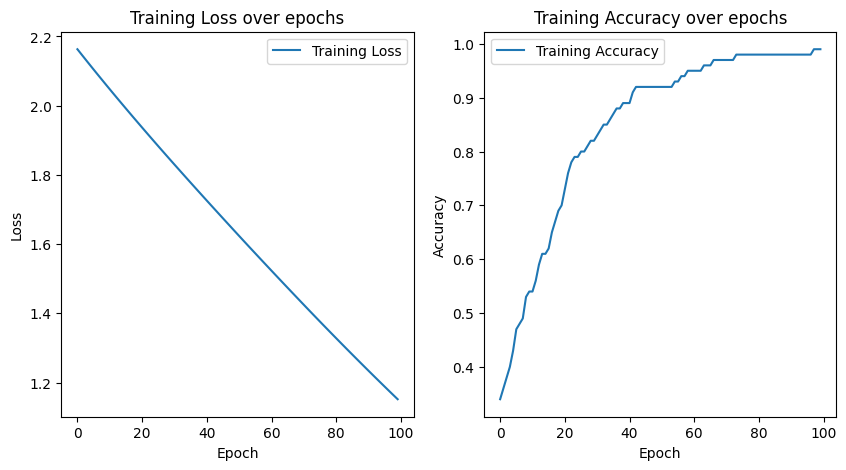

In [14]:
# Loss와 Accuracy 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over epochs')
plt.legend()

plt.show()